Mixing Parameter: 0.100000
##################################################

		      Louvian Algorithm 
Modularity: 0.692698 			 RunTime: 0.361038
----------------------------------------------------------------------
			CNM Algorithm 
Modularity: 0.698807 			 RunTime: 1.474091
----------------------------------------------------------------------
		     Leiden Algorithm 
Modularity: 0.698920 			 RunTime: 0.021660
----------------------------------------------------------------------
		    Eigenvector Algorithm 
Modularity: 0.626556 			 RunTime: 0.195300
----------------------------------------------------------------------
Mixing Parameter: 0.200000
##################################################

		      Louvian Algorithm 
Modularity: 0.567649 			 RunTime: 0.358234
----------------------------------------------------------------------
			CNM Algorithm 
Modularity: 0.563050 			 RunTime: 1.318188
----------------------------------------------------------------------
		     Leiden 

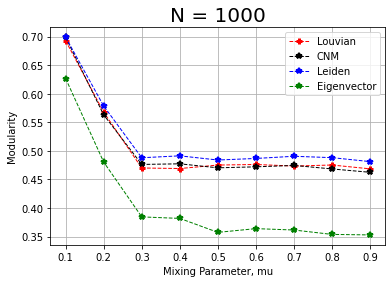

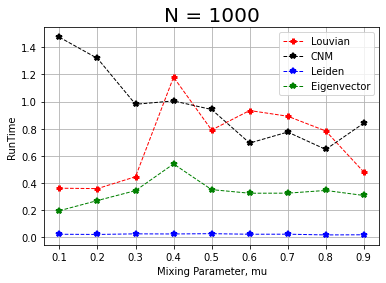

In [21]:
#Implement the main computation and comparison, RUN THIS CELL TO SEE THE FINAL RESULTS, PLEASE.
comparison(mu_list)

In [16]:
# Runs each algorithm with the input data and stores the result, subseqquently calls a function to draw relevant graphs
def comparison(mu_list):
    
    output_dict = {mu:{     'Louvian_Algorithm':{'Modularity':0, 'RunTime':0},
                            'Clauset_Newman_Moore_Algorithm':{'Modularity':0, 'RunTime':0},
                            'Leiden_Algorithm':{'Modularity':0, 'RunTime':0},
                            'Newman_Eigenvector_Algorithm':{'Modularity':0, 'RunTime':0},
                            'Optimal_Modularity_Algorithm':{'Modularity':0, 'RunTime':0}}for mu in mu_list}  
    for mu in mu_list:
        
        print('%s%f%s%s%s' % ('Mixing Parameter: ', mu,'\n', 50*'#','\n'))   
        Initial_Network =  LFR_Benchmarks_Generator(mu)
        output_dict[mu]['Louvian_Algorithm']['Modularity'],output_dict[mu]['Louvian_Algorithm']['RunTime'] = Louvian_Algorithm(Initial_Network)
        output_dict[mu]['Clauset_Newman_Moore_Algorithm']['Modularity'],output_dict[mu]['Clauset_Newman_Moore_Algorithm']['RunTime'] = Clauset_Newman_Moore_Algorithm(Initial_Network)
        output_dict[mu]['Leiden_Algorithm']['Modularity'],output_dict[mu]['Leiden_Algorithm']['RunTime'] = Leiden_Algorithm(Initial_Network)        
        output_dict[mu]['Newman_Eigenvector_Algorithm']['Modularity'],output_dict[mu]['Newman_Eigenvector_Algorithm']['RunTime'] = Newman_Eigenvector_Algorithm(Initial_Network)        
#         output_dict[mu]['Optimal_Modularity_Algorithm']['Modularity'],output_dict[mu]['Optimal_Modularity_Algorithm']['RunTime'] = Optimal_Modularity_Algorithm(Initial_Network)        

    Illustrative_Graph(output_dict)    
    

In [20]:
#Drawing Graphs based on Results
def Illustrative_Graph(output_dict):

    Louvian_Modularity=[]
    Louvian_RunTime=[]
    CNM_Modularity=[]
    CNM_RunTime=[]
    Leiden_Modularity=[]
    Leiden_RunTime=[]
    Eigenvector_Modularity=[]
    Eigenvector_RunTime=[]
    Optimal_Modularity=[]
    Optimal_RunTime=[]
    
    for mu in output_dict.keys():
        
        Louvian_Modularity.append(output_dict[mu]['Louvian_Algorithm']['Modularity'])
        Louvian_RunTime.append(output_dict[mu]['Louvian_Algorithm']['RunTime'])
        CNM_Modularity.append(output_dict[mu]['Clauset_Newman_Moore_Algorithm']['Modularity'])
        CNM_RunTime.append(output_dict[mu]['Clauset_Newman_Moore_Algorithm']['RunTime'])    
        Leiden_Modularity.append(output_dict[mu]['Leiden_Algorithm']['Modularity'])
        Leiden_RunTime.append(output_dict[mu]['Leiden_Algorithm']['RunTime'])    
        Eigenvector_Modularity.append(output_dict[mu]['Newman_Eigenvector_Algorithm']['Modularity'])
        Eigenvector_RunTime.append(output_dict[mu]['Newman_Eigenvector_Algorithm']['RunTime'])   
#         Optimal_Modularity.append(output_dict[mu]['Optimal_Modularity_Algorithm']['Modularity'])
#         Optimal_RunTime.append(output_dict[mu]['Optimal_Modularity_Algorithm']['RunTime'])
    
    
    plt.legend(['Louvian,CNM,Leiden,Eigenvector'], loc='best')
    plt.plot(mu_list, Louvian_Modularity, ls='--', lw=1,marker='+', mew=3, c='red')
    plt.plot(mu_list, CNM_Modularity, ls="--",lw=1, marker='*',mew=2, c='black')
    plt.plot(mu_list, Leiden_Modularity, ls="--",lw=1, marker='*',mew=2, c='blue')
    plt.plot(mu_list, Eigenvector_Modularity, ls="--",lw=1, marker='*',mew=2, c='green')
#     plt.plot(mu_list, Optimal_Modularity, ls=":",lw=1, marker='*',mew=2, c='red')
    plt.ylabel('Modularity', fontsize=10)
    plt.xlabel('Mixing Parameter, mu')
    plt.title('N = 1000', fontsize=20)
    plt.legend(['Louvian','CNM','Leiden','Eigenvector'], loc='best')
    plt.grid()
    plt.show()

    plt.legend(['Louvian,CNM,Leiden,Eigenvector'], loc='best')
    plt.plot(mu_list, Louvian_RunTime, ls='--', lw=1,marker='+', mew=3, c='red')
    plt.plot(mu_list, CNM_RunTime, ls="--",lw=1, marker='*',mew=2, c='black')
    plt.plot(mu_list, Leiden_RunTime, ls="--",lw=1, marker='*',mew=2, c='blue')
    plt.plot(mu_list, Eigenvector_RunTime, ls="--",lw=1, marker='*',mew=2, c='green')
#     plt.plot(mu_list, Optimal_RunTime, ls=":",lw=1, marker='*',mew=2, c='red')
    plt.ylabel('RunTime', fontsize=10)
    plt.xlabel('Mixing Parameter, mu')
    plt.title('N = 1000', fontsize=20)
    plt.legend(['Louvian','CNM','Leiden','Eigenvector'], loc='best')
    plt.grid()
    plt.show()

In [18]:
#Generating synthetic networks based on Lancichinetti-Fortunato-Radicchi (LFR) benchmarks
def LFR_Benchmarks_Generator(mu):
    n = 1000
    tau1 = 3
    tau2 = 1.5
    return(LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5, min_community=20, seed=9))

In [6]:
# Louvian Algorithm
def Louvian_Algorithm(Initial_Network):
    start_time =  time.time()
    G = Initial_Network
    Louvian_Partition = community_louvain.best_partition(G)
    finish_time = time.time()
    Louvian_Modularity = community_louvain.modularity(Louvian_Partition, G)
    Louvian_Algorithm_Runtime = finish_time - start_time
    print     ('\t\t      Louvian Algorithm \nModularity: %f \t\t\t RunTime: %f\n%s'%
              (Louvian_Modularity,Louvian_Algorithm_Runtime,70*'-'))
    return(Louvian_Modularity, Louvian_Algorithm_Runtime)

In [7]:
# Clauset-Newman-Moore Algorithm
def Clauset_Newman_Moore_Algorithm(Initial_Network):
    start_time =  time.time()
    G = Initial_Network
    CNM_Partition = greedy_modularity_communities(G)
    finish_time = time.time()
    CNM_Modularity = nx_comm.modularity(G, CNM_Partition)
    CNM_Algorithm_RunTime = finish_time - start_time
    print      ('\t\t\tCNM Algorithm \nModularity: %f \t\t\t RunTime: %f\n%s'%
               (CNM_Modularity,CNM_Algorithm_RunTime,70*'-'))
    return(CNM_Modularity, CNM_Algorithm_RunTime)

In [8]:
# Leiden Algorithm
def Leiden_Algorithm(Initial_Network):
    start_time =  time.time()
    G = ig.Graph.from_networkx(Initial_Network)
    Leiden_Partition = la.find_partition(G, la.ModularityVertexPartition)
    Leiden_Modularity = G.modularity(Leiden_Partition)
    finish_time = time.time()
    Leiden_Algorithm_RunTime = finish_time - start_time
    print      ('\t\t     Leiden Algorithm \nModularity: %f \t\t\t RunTime: %f\n%s'%
               (Leiden_Modularity,Leiden_Algorithm_RunTime,70*'-'))
    return(Leiden_Modularity, Leiden_Algorithm_RunTime)

In [9]:
# Newman Eigenvector Algorithm
def Newman_Eigenvector_Algorithm(Initial_Network):
    start_time =  time.time()
    G = ig.Graph.from_networkx(Initial_Network)
    Eigenvector_Partition = G.community_leading_eigenvector()
    Eigenvector_Modularity = G.modularity(Eigenvector_Partition)
    finish_time = time.time()
    Eigenvector_Algorithm_RunTime = finish_time - start_time
    print      ('\t\t    Eigenvector Algorithm \nModularity: %f \t\t\t RunTime: %f\n%s'%
               (Eigenvector_Modularity,Eigenvector_Algorithm_RunTime,70*'-'))
    return(Eigenvector_Modularity, Eigenvector_Algorithm_RunTime)

In [10]:
# Optimal Modularity Algorithm - This function is diactivated in the Comparison function due to its rich computational time
# For the results of Table 1 of the summary file, this function was used one time for N=200 and mu=0.1
def Optimal_Modularity_Algorithm(Initial_Network):
    start_time =  time.time()
    G = ig.Graph.from_networkx(Initial_Network)
    Optimal_Partition = G.community_optimal_modularity()
    Optimal_Modularity = G.modularity(Optimal_Partition)
    finish_time = time.time()
    Optimal_Modularity_Algorithm_RunTime = finish_time - start_time
    print      ('\t\t  Optimal_Modularity Algorithm \nModularity: %f \t\t\t RunTime: %f\n%s%s'%
               (Optimal_Modularity, Optimal_Modularity_Algorithm_RunTime,70*'-','\n'))
    return(Optimal_Modularity, Optimal_Modularity_Algorithm_RunTime)

In [11]:
# Necessary libraries and packages
import networkx as nx
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt
import time
import networkx.algorithms.community as nx_comm
from community import community_louvain
from networkx.algorithms.community import greedy_modularity_communities
import leidenalg as la
from networkx.generators.community import LFR_benchmark_graph
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
mu_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]